In [1]:
import pandas as pd
#Display all the columns of the dataset
pd.set_option("display.max_columns",None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
dataset=pd.read_csv("/Users/kumara/Desktop/machine learning /kaggle/spaceship titanic/spaceship-titanic/train.csv")

In [3]:
print(dataset.shape)

(8693, 14)


In [4]:
dataset.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


# EDA

## Missing Values

In [5]:
#Check the percentage of nan values in each column
#To get the features which has missing values
features_with_na=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 ]

#To get the percentage of nan values in each feature
for feature in features_with_na:
    print(feature,np.round(dataset[feature].isnull().mean(),4),"% missing values")

HomePlanet 0.0231 % missing values
CryoSleep 0.025 % missing values
Cabin 0.0229 % missing values
Destination 0.0209 % missing values
Age 0.0206 % missing values
VIP 0.0234 % missing values
RoomService 0.0208 % missing values
FoodCourt 0.0211 % missing values
ShoppingMall 0.0239 % missing values
Spa 0.0211 % missing values
VRDeck 0.0216 % missing values
Name 0.023 % missing values


In [6]:
#relationship between missing vals and target(Transported)
data=dataset.copy()
for feature in features_with_na:
    data[feature]=np.where(data[feature].isnull(),1,0)
pd.pivot_table(data,index="Transported",values=features_with_na)

,Age,Cabin,CryoSleep,Destination,FoodCourt,HomePlanet,Name,RoomService,ShoppingMall,Spa,VIP,VRDeck
Transported,,,,,,,,,,,,
False,0.020626,0.022943,0.025724,0.020857,0.019467,0.022711,0.022943,0.022711,0.021784,0.021321,0.022943,0.020857
True,0.020557,0.022841,0.024212,0.021014,0.022613,0.023527,0.023070,0.018958,0.026039,0.020786,0.023755,0.022385


In [7]:
print("Id of passengers {}".format(len(dataset["PassengerId"])))

Id of passengers 8693


In [8]:
dataset["PassengerId"]

0       0001_01
1       0002_01
2       0003_01
3       0003_02
4       0004_01
         ...   
8688    9276_01
8689    9278_01
8690    9279_01
8691    9280_01
8692    9280_02
Name: PassengerId, Length: 8693, dtype: object

## Numerical Features

In [9]:
#numerical_features=[feature for feature in dataset.columns if dataset[feature].dtypes!="O"]
#quickway to get numerical features
numerical_features=dataset.describe().columns
print("No of numerical features",len(numerical_features))

dataset[numerical_features].head()
    

No of numerical features 6


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,39.0,0.0,0.0,0.0,0.0,0.0
1,24.0,109.0,9.0,25.0,549.0,44.0
2,58.0,43.0,3576.0,0.0,6715.0,49.0
3,33.0,0.0,1283.0,371.0,3329.0,193.0
4,16.0,303.0,70.0,151.0,565.0,2.0


## Type 1 Discrete Features 

In [10]:

discrete_features=[feature for feature in numerical_features if len(dataset[feature].unique())<25 and  feature != "PassengerId"]
print("Discrete feature count",len(discrete_features))
#print(discrete_features)
print("No discrete numerical features")

Discrete feature count 0
No discrete numerical features


## Type 2 Continuous Features

In [11]:
continuous_features=[feature for feature in numerical_features if feature not in discrete_features+["PassengerId"]]
print("No of continuous features",len(continuous_features))
print(continuous_features)

No of continuous features 6
['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']


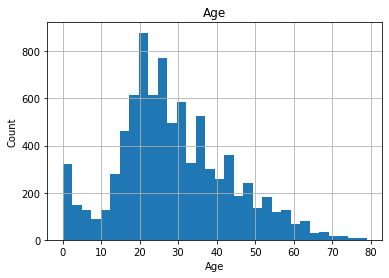

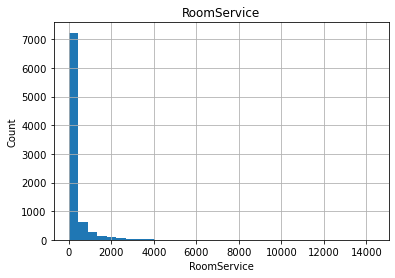

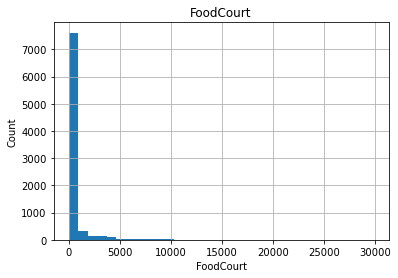

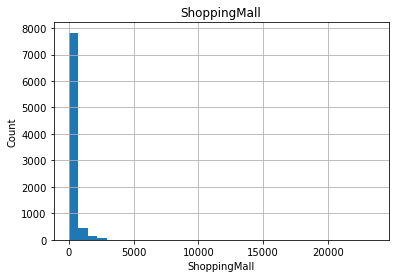

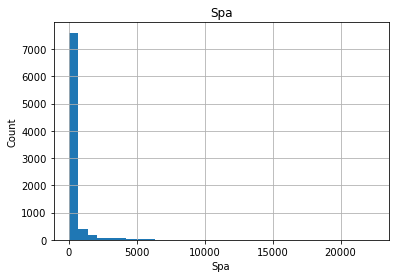

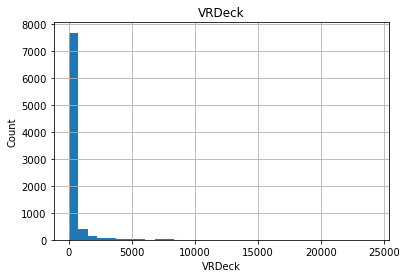

In [12]:
for feature in continuous_features:
    data=dataset.copy()
    data[feature].hist(bins=32)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

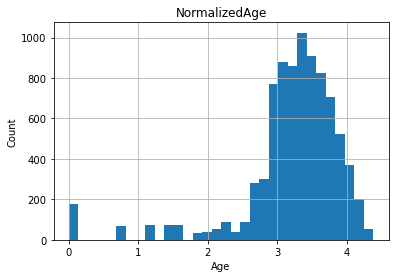

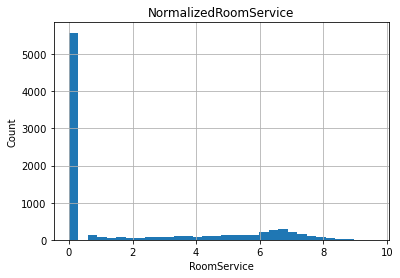

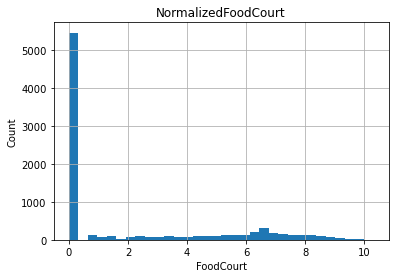

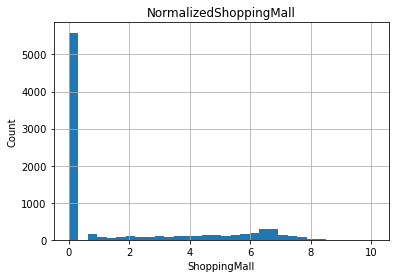

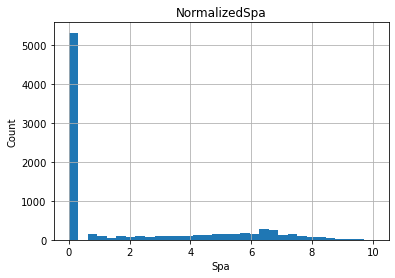

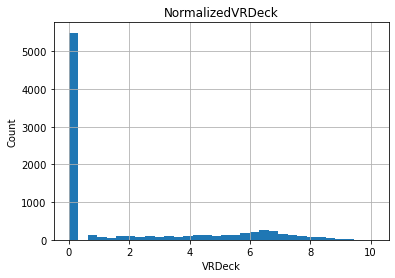

In [13]:
#above distributions are not normalized.Convert log vals to obtain more normalized distribution
data=dataset.copy()
for feature in data[continuous_features]:
    data[feature]=np.log(data[feature]+1)
    data[feature].hist(bins=32)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title("Normalized"+feature)
    plt.show()

        

                   Age  RoomService  FoodCourt  ShoppingMall       Spa  \
Age           1.000000     0.068723   0.130421      0.033133  0.123970   
RoomService   0.068723     1.000000  -0.015889      0.054480  0.010080   
FoodCourt     0.130421    -0.015889   1.000000     -0.014228  0.221891   
ShoppingMall  0.033133     0.054480  -0.014228      1.000000  0.013879   
Spa           0.123970     0.010080   0.221891      0.013879  1.000000   
VRDeck        0.101007    -0.019581   0.227995     -0.007322  0.153821   

                VRDeck  
Age           0.101007  
RoomService  -0.019581  
FoodCourt     0.227995  
ShoppingMall -0.007322  
Spa           0.153821  
VRDeck        1.000000  


<AxesSubplot:>

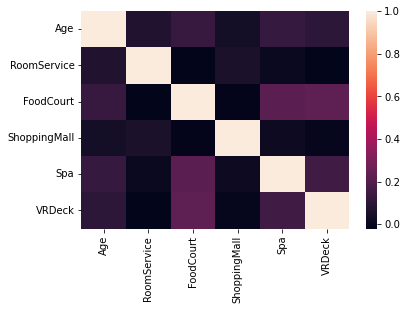

In [14]:
print(dataset[continuous_features].corr())
sns.heatmap(dataset[continuous_features].corr())

In [15]:
pd.pivot_table(dataset, index = 'Transported', values = continuous_features)

,Age,FoodCourt,RoomService,ShoppingMall,Spa,VRDeck
Transported,,,,,,
False,29.922858,382.615930,389.266066,167.566217,564.382666,543.629822
True,27.748834,532.691984,63.098021,179.829972,61.675531,69.148131


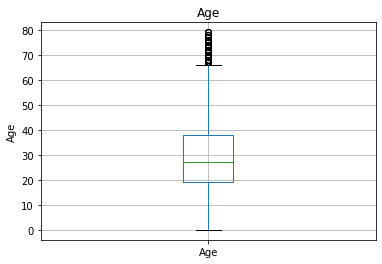

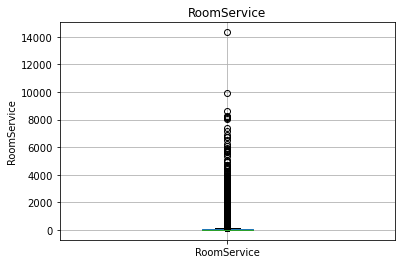

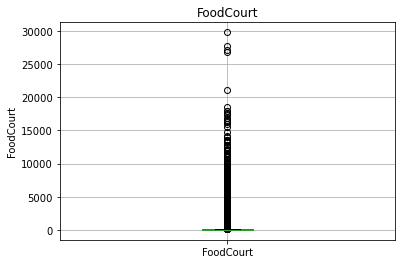

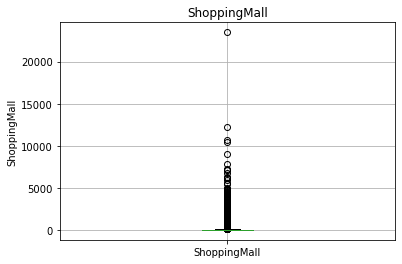

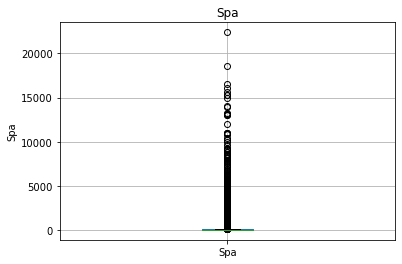

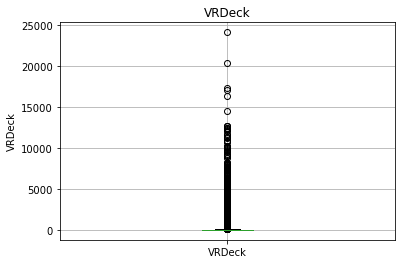

In [16]:
#outliers

for feature in continuous_features:
    dataset.boxplot(column=feature )
    plt.ylabel(feature)
    plt.title(feature)
    plt.show();

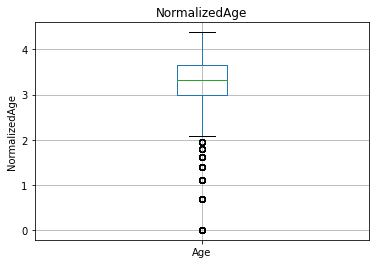

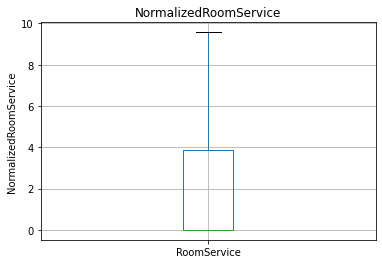

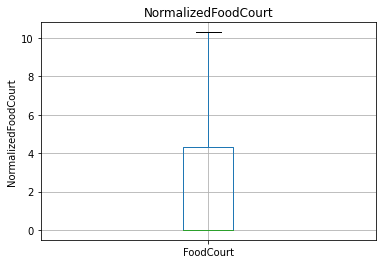

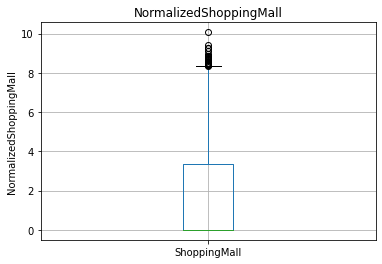

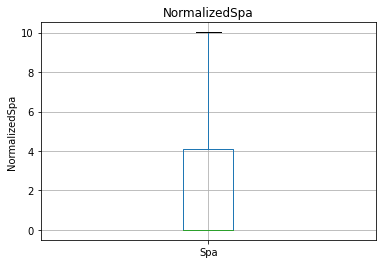

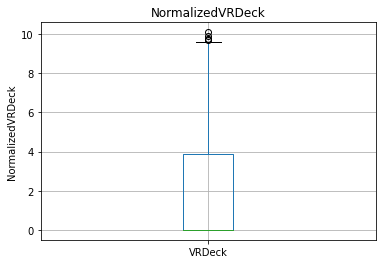

In [17]:
#outliers after log normalization

data=dataset.copy()
for feature in continuous_features:
    
    data[feature]=np.log(data[feature]+1)
    data.boxplot(feature)
    plt.ylabel("Normalized"+feature)
    plt.title("Normalized"+feature)
    plt.show();

It is necessary to log scale all continuous numerical features except Age.Because Age already have a normal distribution

## Categorical features


In [18]:
categorical_features=[feature for feature in dataset.columns if feature not in (numerical_features.tolist()+["Name","PassengerId"]) ]

In [19]:
categorical_features


['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Transported']

In [20]:
for feature in categorical_features:
    print("The feature is {} and the number of categories are {}".format(feature,len(dataset[feature].unique())))

The feature is HomePlanet and the number of categories are 4
The feature is CryoSleep and the number of categories are 3
The feature is Cabin and the number of categories are 6561
The feature is Destination and the number of categories are 4
The feature is VIP and the number of categories are 3
The feature is Transported and the number of categories are 2


In [21]:
#for feature in categorical_features:
#    sns.barplot(dataset[feature].value_counts().index,dataset[feature].value_counts()).set_title(feature)
#    plt.show()

Cabin graph is  very messy. This is an area where we may want to do some feature engineering.Also we have to see whether Name(any special persons such as Dr.,Colnel etc.) and PassengerId(any group number) has any kind of. relationship to Transported.

In [22]:
categorical_features_temp=[feature for feature in categorical_features if feature not in ["Transported","Cabin"]]
for feature in categorical_features_temp:
    print(pd.pivot_table(dataset,index="Transported",columns=feature,values="Cabin",aggfunc="count"))
    print()

HomePlanet   Earth  Europa  Mars
Transported                     
False         2594     706   820
True          1913    1364   902

CryoSleep    False  True
Transported             
False         3571   537
True          1760  2416

Destination  55 Cancri e  PSO J318.5-22  TRAPPIST-1e
Transported                                         
False                684            382         3063
True                1066            396         2725

VIP          False  True
Transported             
False         4003   118
True          4101    75



#  Feature Engineering


## 1) Cabin,Name and PassengerId columns

## 1) Cabin

In [23]:
dataset["Cabin"]

0          B/0/P
1          F/0/S
2          A/0/S
3          A/0/S
4          F/1/S
          ...   
8688      A/98/P
8689    G/1499/S
8690    G/1500/S
8691     E/608/S
8692     E/608/S
Name: Cabin, Length: 8693, dtype: object

In [24]:
data=dataset.copy()
data["Cabin_multiple"]=data["Cabin"].apply(lambda x: 0 if pd.isna(x) else len(str(x).split("/")))
print(data["Cabin_multiple"].value_counts())
print(data["Cabin"].isnull().sum())
# every non null entry is in  deck/num/side format

3    8494
0     199
Name: Cabin_multiple, dtype: int64
199


In [25]:
pd.pivot_table(data,index="Transported",columns="Cabin_multiple",values="PassengerId",aggfunc="count")

Cabin_multiple,0,3
Transported,,
False,99,4216
True,100,4278


In [26]:
#categorize with deck,num and side.NaN values are considered as seperate group in each
data["Cabin_deck"]=data["Cabin"].apply(lambda x: "Missing" if pd.isna(x) else str(x).split("/")[0])
data["Cabin_num"]=data["Cabin"].apply(lambda x: "Missing" if pd.isna(x) else str(x).split("/")[1])
data["Cabin_side"]=data["Cabin"].apply(lambda x: "Missing" if pd.isna(x) else str(x).split("/")[2])

/Users/kumara/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Cabin_deck')

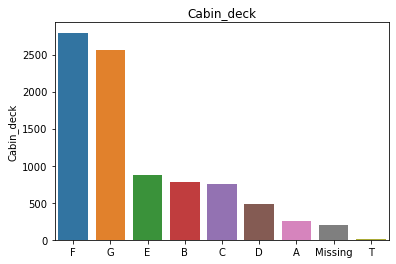

In [27]:
## 1 Cabin_deck
sns.barplot(data["Cabin_deck"].value_counts().index,data["Cabin_deck"].value_counts()).set_title("Cabin_deck")

In [28]:
pd.pivot_table(data,index="Transported",columns="Cabin_deck",values="PassengerId",aggfunc="count")

Cabin_deck,A,B,C,D,E,F,G,Missing,T
Transported,,,,,,,,,
False,129,207,239,271,563,1565,1238,99,4
True,127,572,508,207,313,1229,1321,100,1


/Users/kumara/opt/anaconda3/envs/tf/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:ylabel='Cabin_side'>

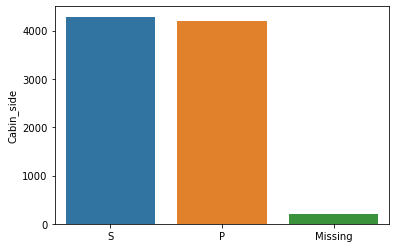

In [29]:
## 2 Cabin_side
sns.barplot(data["Cabin_side"].value_counts().index,data["Cabin_side"].value_counts())

In [30]:
pd.pivot_table(data,index="Transported",columns="Cabin_side",values="PassengerId",aggfunc="count")

Cabin_side,Missing,P,S
Transported,,,
False,99,2308,1908
True,100,1898,2380


There is some relation between the target and Cabin_side and Cabin_deck.We can replace Cabin feature with those 2.

In [31]:
dataset["Cabin_deck"]=data["Cabin_deck"]
dataset["Cabin_side"]=data["Cabin_side"]

In [32]:
#code to drop Cabin
dataset.drop("Cabin",axis=1,inplace=True)

In [33]:
dataset.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Cabin_deck,Cabin_side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,S


## 2) Name

In [34]:
data["Name"]

0         Maham Ofracculy
1            Juanna Vines
2           Altark Susent
3            Solam Susent
4       Willy Santantines
              ...        
8688    Gravior Noxnuther
8689      Kurta Mondalley
8690         Fayey Connon
8691     Celeon Hontichre
8692     Propsh Hontichre
Name: Name, Length: 8693, dtype: object

In [35]:
#feature engineering on person's title 

data['name_title'] = data["Name"].apply(lambda x: "Missing" if pd.isna(x) else x.split(',')[0].strip())

In [36]:
data["name_title"]

0         Maham Ofracculy
1            Juanna Vines
2           Altark Susent
3            Solam Susent
4       Willy Santantines
              ...        
8688    Gravior Noxnuther
8689      Kurta Mondalley
8690         Fayey Connon
8691     Celeon Hontichre
8692     Propsh Hontichre
Name: name_title, Length: 8693, dtype: object

There are no any special names Dr,Mrs. etc.We can omit Name column.

In [37]:
##code for drop name
dataset.drop("Name",axis=1,inplace=True)

## 3) PassengerId

Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always

In [38]:
#No any nulls
dataset["PassengerId"].isnull().sum()

0

In [39]:
dataset["Passenger_Group"]=dataset["PassengerId"].apply(lambda x: int(str(x).split("_")[0]))

In [40]:
dataset["Passenger_Group"]

0          1
1          2
2          3
3          3
4          4
        ... 
8688    9276
8689    9278
8690    9279
8691    9280
8692    9280
Name: Passenger_Group, Length: 8693, dtype: int64

In [41]:
print("No of groups {}".format(len(dataset["Passenger_Group"].unique())))
print("No of passengers {}".format(len(dataset)))

No of groups 6217
No of passengers 8693


(array([867., 877., 854., 850., 911., 862., 937., 825., 843., 867.]),
 array([1.0000e+00, 9.2890e+02, 1.8568e+03, 2.7847e+03, 3.7126e+03,
        4.6405e+03, 5.5684e+03, 6.4963e+03, 7.4242e+03, 8.3521e+03,
        9.2800e+03]),
 <BarContainer object of 10 artists>)

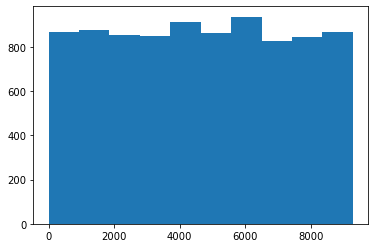

In [42]:
plt.hist(dataset["Passenger_Group"])

In [43]:
#dataset.groupby("Passenger_Group")["Transported"].median().plot().bar()
#plt.title("Passenger_Group")
#plt.show()

In [44]:
dataset.drop("PassengerId",axis=1,inplace=True)

In [45]:
dataset.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,Cabin_side,Passenger_Group
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P,1
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S,2
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S,3
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S,3
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S,4


## 2) Missing Values


1)Categorical Features

In [46]:
categorical_with_na=[feature for feature in dataset.columns if dataset[feature].isna().sum()>1 
                     and dataset[feature].dtypes=="O"]
for feature in categorical_with_na:
    print("{}: {}% percentage of missing values".format(feature,np.round(dataset[feature].isnull().mean(),4)))

HomePlanet: 0.0231% percentage of missing values
CryoSleep: 0.025% percentage of missing values
Destination: 0.0209% percentage of missing values
VIP: 0.0234% percentage of missing values


In [47]:
## Replace missing value with a new label
def replace_categorical_features(df,categorical_features):
    data=df.copy()
    data[categorical_features]=data[categorical_features].fillna("Missing")
    return data

dataset=replace_categorical_features(dataset,categorical_with_na)


In [48]:
#check
dataset[categorical_with_na].isnull().sum()

HomePlanet     0
CryoSleep      0
Destination    0
VIP            0
dtype: int64

In [49]:
dataset.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,Cabin_side,Passenger_Group
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P,1
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S,2
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S,3
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S,3
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S,4


2) Numerical Features

In [50]:
numerical_with_na=[feature for feature in dataset.columns if dataset[feature].isnull().sum()>1 
                   and dataset[feature].dtypes!="0" ]
for feature in numerical_with_na:
    print("{}: {}% percentage of missing values".format(feature,np.round(dataset[feature].isnull().mean(),4)) )

Age: 0.0206% percentage of missing values
RoomService: 0.0208% percentage of missing values
FoodCourt: 0.0211% percentage of missing values
ShoppingMall: 0.0239% percentage of missing values
Spa: 0.0211% percentage of missing values
VRDeck: 0.0216% percentage of missing values


In [51]:
#replace with medain since there are outliars
    
    
for feature in numerical_with_na:

    median_val=dataset[feature].median()
    dataset[feature+"_Nan"]=np.where(dataset[feature].isnull(),1,0)
    dataset[feature].fillna(median_val,inplace=True)
    
dataset[numerical_with_na].isnull().sum()    

    

    

Age             0
RoomService     0
FoodCourt       0
ShoppingMall    0
Spa             0
VRDeck          0
dtype: int64

In [52]:
dataset.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,Cabin_side,Passenger_Group,Age_Nan,RoomService_Nan,FoodCourt_Nan,ShoppingMall_Nan,Spa_Nan,VRDeck_Nan
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,P,1,0,0,0,0,0,0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,S,2,0,0,0,0,0,0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,S,3,0,0,0,0,0,0
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,S,3,0,0,0,0,0,0
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,S,4,0,0,0,0,0,0


In [53]:
dataset.isnull().sum()

HomePlanet          0
CryoSleep           0
Destination         0
Age                 0
VIP                 0
RoomService         0
FoodCourt           0
ShoppingMall        0
Spa                 0
VRDeck              0
Transported         0
Cabin_deck          0
Cabin_side          0
Passenger_Group     0
Age_Nan             0
RoomService_Nan     0
FoodCourt_Nan       0
ShoppingMall_Nan    0
Spa_Nan             0
VRDeck_Nan          0
dtype: int64

Now our dataset has no any NaN value!

## 3) Continuos Numerical Features(except Age) - Log scaling 

In [54]:
continuous_features=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for feature in continuous_features:
    dataset[feature]=np.log(dataset[feature]+1)
    

In [55]:
dataset.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,Cabin_side,Passenger_Group,Age_Nan,RoomService_Nan,FoodCourt_Nan,ShoppingMall_Nan,Spa_Nan,VRDeck_Nan
0,Europa,False,TRAPPIST-1e,39.0,False,0.000000,0.000000,0.000000,0.000000,0.000000,False,B,P,1,0,0,0,0,0,0
1,Earth,False,TRAPPIST-1e,24.0,False,4.700480,2.302585,3.258097,6.309918,3.806662,True,F,S,2,0,0,0,0,0,0
2,Europa,False,TRAPPIST-1e,58.0,True,3.784190,8.182280,0.000000,8.812248,3.912023,False,A,S,3,0,0,0,0,0,0
3,Europa,False,TRAPPIST-1e,33.0,False,0.000000,7.157735,5.918894,8.110728,5.267858,False,A,S,3,0,0,0,0,0,0
4,Earth,False,TRAPPIST-1e,16.0,False,5.717028,4.262680,5.023881,6.338594,1.098612,True,F,S,4,0,0,0,0,0,0


## 4) Handling Rare Categorical Features

In [56]:
categorical_features=[feature for feature in dataset.columns if dataset[feature].dtypes=="O"]
print(categorical_features)
for feature in categorical_features:
    temp=dataset.groupby(feature)['Transported'].count()/len(dataset)
    temp_df=temp[temp>0.01].index
    dataset[feature]=np.where(dataset[feature].isin(temp_df),dataset[feature],'Rare_var')
 

['HomePlanet', 'CryoSleep', 'Destination', 'VIP', 'Cabin_deck', 'Cabin_side']


## 5) Encoding categorical features

In [57]:
encorder={}
for feature in categorical_features+["Transported"]:
    labels_ordered=dataset.groupby([feature])['Transported'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    encorder[feature]=labels_ordered
    dataset[feature]=dataset[feature].map(labels_ordered)

In [58]:
print(encorder)

{'HomePlanet': {'Earth': 0, 'Missing': 1, 'Mars': 2, 'Europa': 3}, 'CryoSleep': {False: 0, 'Missing': 1, True: 2}, 'Destination': {'TRAPPIST-1e': 0, 'PSO J318.5-22': 1, 'Missing': 2, '55 Cancri e': 3}, 'VIP': {True: 0, False: 1, 'Missing': 2}, 'Cabin_deck': {'Rare_var': 0, 'E': 1, 'D': 2, 'F': 3, 'A': 4, 'Missing': 5, 'G': 6, 'C': 7, 'B': 8}, 'Cabin_side': {'P': 0, 'Missing': 1, 'S': 2}, 'Transported': {False: 0, True: 1}}


In [59]:
dataset.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,Cabin_side,Passenger_Group,Age_Nan,RoomService_Nan,FoodCourt_Nan,ShoppingMall_Nan,Spa_Nan,VRDeck_Nan
0,3,0,0,39.0,1,0.000000,0.000000,0.000000,0.000000,0.000000,0,8,0,1,0,0,0,0,0,0
1,0,0,0,24.0,1,4.700480,2.302585,3.258097,6.309918,3.806662,1,3,2,2,0,0,0,0,0,0
2,3,0,0,58.0,0,3.784190,8.182280,0.000000,8.812248,3.912023,0,4,2,3,0,0,0,0,0,0
3,3,0,0,33.0,1,0.000000,7.157735,5.918894,8.110728,5.267858,0,4,2,3,0,0,0,0,0,0
4,0,0,0,16.0,1,5.717028,4.262680,5.023881,6.338594,1.098612,1,3,2,4,0,0,0,0,0,0


In [60]:
dataset.shape

(8693, 20)

## 5) Scaling 

In [61]:
scale_features=[feature for feature in dataset.columns if feature not in ["Transported"]]

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
dataset[scale_features]=scaler.fit_transform(dataset[scale_features])
    


In [62]:
dataset.shape

(8693, 20)

In [63]:
dataset.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_deck,Cabin_side,Passenger_Group,Age_Nan,RoomService_Nan,FoodCourt_Nan,ShoppingMall_Nan,Spa_Nan,VRDeck_Nan
0,1.0,0.0,0.0,0.493671,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0,1.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.303797,0.5,0.491170,0.223493,0.323723,0.629907,0.377219,1,0.375,1.0,0.000108,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.734177,0.0,0.395423,0.794185,0.000000,0.879710,0.387660,0,0.500,1.0,0.000216,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.417722,0.5,0.000000,0.694741,0.588099,0.809679,0.522016,0,0.500,1.0,0.000216,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.202532,0.5,0.597392,0.413743,0.499171,0.632770,0.108866,1,0.375,1.0,0.000323,0.0,0.0,0.0,0.0,0.0,0.0


## Save data

In [64]:
dataset.to_csv("X_train.csv",index=False)


In [65]:
## Capture the dependent feature
y_train=dataset["Transported"]
y_train

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64

In [66]:
## drop dependent feature from dataset
X_train=dataset.drop(["Transported"],axis=1)

In [67]:
X_train

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_deck,Cabin_side,Passenger_Group,Age_Nan,RoomService_Nan,FoodCourt_Nan,ShoppingMall_Nan,Spa_Nan,VRDeck_Nan
0,1.0,0.0,0.000000,0.493671,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,1.000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.303797,0.5,0.491170,0.223493,0.323723,0.629907,0.377219,0.375,1.0,0.000108,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.000000,0.734177,0.0,0.395423,0.794185,0.000000,0.879710,0.387660,0.500,1.0,0.000216,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.000000,0.417722,0.5,0.000000,0.694741,0.588099,0.809679,0.522016,0.500,1.0,0.000216,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.202532,0.5,0.597392,0.413743,0.499171,0.632770,0.108866,0.375,1.0,0.000323,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1.0,0.0,1.000000,0.518987,0.0,0.000000,0.856823,0.000000,0.739216,0.427839,0.500,0.0,0.999569,0.0,0.0,0.0,0.0,0.0,0.0
8689,0.0,1.0,0.333333,0.227848,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.750,1.0,0.999784,0.0,0.0,0.0,0.0,0.0,0.0
8690,0.0,0.0,0.000000,0.329114,0.5,0.000000,0.000000,0.748704,0.069196,0.000000,0.750,1.0,0.999892,0.0,0.0,0.0,0.0,0.0,0.0
8691,1.0,0.0,1.000000,0.405063,0.5,0.000000,0.675214,0.000000,0.585921,0.800891,0.125,1.0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Selection

In [68]:
### Apply Feature Selection
# first, I specify the Lasso Regression model, and I
# select a suitable alpha (equivalent of penalty).
# The bigger the alpha the less features that will be selected.

# Then I use the selectFromModel object from sklearn, which
# will select the features which coefficients are non-zero
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

feature_sel_model = SelectFromModel(Lasso(alpha=0.005, random_state=0)) # remember to set the seed, the random state in this function
feature_sel_model.fit(X_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [69]:
# let's print the number of total and selected features

# this is how we can make a list of the selected features
selected_feat = X_train.columns[(feature_sel_model.get_support())]

# let's print some stats
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(feature_sel_model.estimator_.coef_ == 0)))

total features: 19
selected features: 8
features with coefficients shrank to zero: 11


In [70]:
selected_feat

Index(['HomePlanet', 'CryoSleep', 'Destination', 'RoomService', 'FoodCourt',
       'Spa', 'VRDeck', 'Cabin_side'],
      dtype='object')

In [71]:
X_train=X_train[selected_feat]

In [72]:
X_train

,HomePlanet,CryoSleep,Destination,RoomService,FoodCourt,Spa,VRDeck,Cabin_side
0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.0,0.0,0.000000,0.491170,0.223493,0.629907,0.377219,1.0
2,1.0,0.0,0.000000,0.395423,0.794185,0.879710,0.387660,1.0
3,1.0,0.0,0.000000,0.000000,0.694741,0.809679,0.522016,1.0
4,0.0,0.0,0.000000,0.597392,0.413743,0.632770,0.108866,1.0
...,...,...,...,...,...,...,...,...
8688,1.0,0.0,1.000000,0.000000,0.856823,0.739216,0.427839,0.0
8689,0.0,1.0,0.333333,0.000000,0.000000,0.000000,0.000000,1.0
8690,0.0,0.0,0.000000,0.000000,0.000000,0.069196,0.000000,1.0
8691,1.0,0.0,1.000000,0.000000,0.675214,0.585921,0.800891,1.0


In [73]:
X_train.shape

(8693, 8)

In [74]:
from keras.utils import np_utils

new_y_train=np_utils.to_categorical(y_train)

Using TensorFlow backend.


In [75]:
new_y_train

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]], dtype=float32)

In [76]:
new_y_train.shape

(8693, 2)

In [77]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(X_train,new_y_train,test_size=0.1)

## Model Creation 

In [78]:
from keras.models import Sequential
from keras.layers import Dense,Dropout

model=Sequential()

model.add(Dense(64,input_dim=X_train.shape[1],activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(new_y_train.shape[1],activation="softmax"))

model.compile(loss="categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                576       
_________________________________________________________________
dense_2 (Dense)              (None, 128)               8320      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 130       
Total params: 17,282
Trainable params: 17,282
Non-trainable params: 0
_________________________________________________________________


2022-07-06 16:25:15.732126: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2022-07-06 16:25:15.732576: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 8. Tune using inter_op_parallelism_threads for best performance.


## Model Training

In [79]:
history=model.fit(train_data,train_target,validation_data=(test_data,test_target),epochs=10)

Train on 7823 samples, validate on 870 samples
Epoch 1/10
7823/7823 [==============================] - 1s 141us/step - loss: 0.6587 - accuracy: 0.6370 - val_loss: 0.6134 - val_accuracy: 0.7368
Epoch 2/10
7823/7823 [==============================] - 1s 96us/step - loss: 0.5830 - accuracy: 0.7273 - val_loss: 0.5338 - val_accuracy: 0.7655
Epoch 3/10
7823/7823 [==============================] - 1s 96us/step - loss: 0.5333 - accuracy: 0.7432 - val_loss: 0.4942 - val_accuracy: 0.7759
Epoch 4/10
7823/7823 [==============================] - 1s 90us/step - loss: 0.5105 - accuracy: 0.7525 - val_loss: 0.4765 - val_accuracy: 0.7782
Epoch 5/10
7823/7823 [==============================] - 1s 90us/step - loss: 0.4963 - accuracy: 0.7616 - val_loss: 0.4677 - val_accuracy: 0.7839
Epoch 6/10
7823/7823 [==============================] - 1s 108us/step - loss: 0.4871 - accuracy: 0.7680 - val_loss: 0.4612 - val_accuracy: 0.7828
Epoch 7/10
7823/7823 [==============================] - 1s 107us/step - loss: 0.4

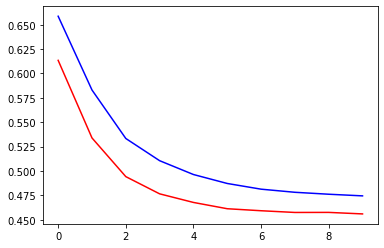

In [80]:
plt.plot(history.history["loss"],"b")
plt.plot(history.history["val_loss"],"r")
plt.show()

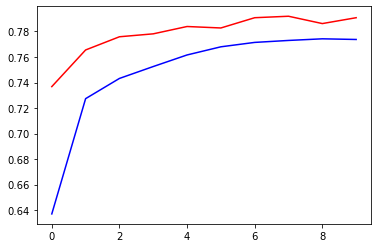

In [81]:
plt.plot(history.history["accuracy"],"b")
plt.plot(history.history["val_accuracy"],"r")

## Model Saving

In [82]:
model.save_weights("space_titanics.h5")
model.save("space_titanics.model")

## Testing

In [83]:

testset=pd.read_csv("/Users/kumara/Desktop/machine learning /kaggle/spaceship titanic/spaceship-titanic/test.csv")

In [84]:
testset

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


In [85]:
#add cabin_deck and cabin_side column instead of cabin
testset["Cabin_deck"]=testset["Cabin"].apply(lambda x: "Missing" if pd.isna(x) else str(x).split("/")[0])
testset["Cabin_side"]=testset["Cabin"].apply(lambda x: "Missing" if pd.isna(x) else str(x).split("/")[2])
testset.drop("Cabin",axis=1,inplace=True)

In [86]:
#Drop name column
testset.drop("Name",axis=1,inplace=True)

In [87]:
#Drop PassengerId column and add Passneger_Group
testset["Passenger_Group"]=testset["PassengerId"].apply(lambda x: int(str(x).split("_")[0]))
testset.drop("PassengerId",axis=1,inplace=True)

In [88]:
#missing values-Categorical
categorical_with_na=[feature for feature in testset.columns if testset[feature].isna().sum()>1 
                     and testset[feature].dtypes=="O"]
## Replace missing value with a new label
def replace_categorical_features(df,categorical_features):
    data=df.copy()
    data[categorical_features]=data[categorical_features].fillna("Missing")
    return data

testset=replace_categorical_features(testset,categorical_with_na)



In [89]:
#missing values-Numerical
numerical_with_na=[feature for feature in testset.columns if testset[feature].isnull().sum()>1 
                   and testset[feature].dtypes!="0" ]


for feature in numerical_with_na:

    median_val=testset[feature].median()
    testset[feature+"_Nan"]=np.where(testset[feature].isnull(),1,0)
    testset[feature].fillna(median_val,inplace=True)
 

In [90]:
#log scaling except Age
continuous_features=['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for feature in continuous_features:
    testset[feature]=np.log(testset[feature]+1)


In [91]:
#rare categorical features
categorical_features=[feature for feature in testset.columns if testset[feature].dtypes=="O"]

for feature in categorical_features:
    temp=testset.groupby(feature)['Age'].count()/len(testset)
    temp_df=temp[temp>0.01].index
    testset[feature]=np.where(testset[feature].isin(temp_df),testset[feature],'Rare_var')

In [92]:
#encoding
for feature in categorical_features:
    testset[feature]=testset[feature].map(encorder[feature])

In [93]:
#scaling
all_features=testset.columns
testset[all_features]=scaler.transform(testset[all_features])

In [94]:
testset

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_deck,Cabin_side,Passenger_Group,Age_Nan,RoomService_Nan,FoodCourt_Nan,ShoppingMall_Nan,Spa_Nan,VRDeck_Nan
0,0.000000,1.0,0.000000,0.341772,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.750,1.0,0.001293,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.000000,0.240506,0.5,0.000000,0.223493,0.000000,0.793225,0.000000,0.375,1.0,0.001832,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,1.0,1.000000,0.392405,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.875,1.0,0.001940,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.0,0.000000,0.481013,0.5,0.000000,0.854416,0.000000,0.519506,0.631561,0.875,1.0,0.002155,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.000000,0.253165,0.5,0.250565,0.000000,0.641386,0.000000,0.000000,0.375,1.0,0.002371,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,0.000000,1.0,0.000000,0.430380,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.750,1.0,0.998491,0.0,0.0,0.0,0.0,0.0,0.0
4273,0.000000,0.0,0.000000,0.531646,0.5,0.000000,0.654475,0.287186,0.239377,0.493167,0.625,0.5,0.998815,0.0,0.0,0.0,0.0,0.0,0.0
4274,0.666667,1.0,1.000000,0.329114,0.5,0.000000,0.000000,0.000000,0.000000,0.000000,0.250,0.0,0.999030,1.0,0.0,0.0,0.0,0.0,0.0
4275,1.000000,0.0,0.666667,0.329114,0.5,0.000000,0.766199,0.000000,0.000000,0.620479,0.250,0.0,0.999246,1.0,0.0,0.0,0.0,0.0,0.0


In [95]:
testset.shape

(4277, 19)

In [96]:
#feature selection
testset=testset[selected_feat]

In [97]:
testset.shape

(4277, 8)

In [98]:
#get predictions
prediction=model.predict(testset)

In [99]:
prediction.shape

(4277, 2)

In [100]:
type(prediction)

numpy.ndarray

In [114]:
#convert 0 and 1s
labels=np.argmax(prediction,axis=1)

In [116]:
#convert boolean format
threshold=0.5
final_labels=np.where(labels>0.5,True,False)

In [117]:
final_labels

array([ True, False,  True, ...,  True,  True,  True])

In [119]:
final_labels.reshape(len(final_labels))

array([ True, False,  True, ...,  True,  True,  True])

In [120]:
sample=pd.read_csv("/Users/kumara/Desktop/machine learning /kaggle/spaceship titanic/spaceship-titanic/sample_submission.csv")
sub=pd.DataFrame({'PassengerId':sample['PassengerId'].values.tolist(),'Transported':final_labels})
sub.to_csv('submission.csv',index=False)
